# Astrophysics Education from Google Books

The humanities strive to gain an understanding of the human condition, and part of that human condition is how we interact with and understand the universe that we live in. Studying outer space allows us to think of the world in a larger context, not only in physical size but also in very long time scales. My goal is to help people understand at least a small part of how interconnected we are with our expansive universe.

## How accessible is astrophysics education to the public and is interactive education more effective? 
This question is not simply asking if people have access to astrophysics information, but if that information is communicated in a way that can be easily understood by the common person, rather than the scientific community. It is important for society to understand the universe we live in because being exposed to larger scales of information can encourage people to think in new ways, bringing innovation to all sectors of society.

## Use Google Books API to search for books online

In [1]:
# requests library is necessary for most interaction with the internet in Python
# time library will be used to pause the for loop between calls to avoid overloading the server
# csv library allows us to create a csv file
import requests
import time
import csv

In [2]:
#google books endpoint URL
books_url = 'https://www.googleapis.com/books/v1/volumes?'

In [3]:
#we don't need all the information in the results dictionary, so let's make a function which can extract the relevent data.

def parse_results(results):
    
    '''parse_results takes in the results variable (dictionary) as an argument and returns a list of dictionaries.
    Each dictionary within the list corresponds to a book and has an author key, title, key, publisher key, 
    and description key'''
    
    results_list = []

    for book in results['items']:

        title = book['volumeInfo']['title']

        # some books don't have authors, dates, or a description
        try:
            authors = ','.join(book['volumeInfo']['authors'])
        except:
            authors = 'NA'
        
        try:
            publisher = book['volumeInfo']['publisher']
        except:
            publisher = 'NA'

        try:
            description = book['volumeInfo']['description']
        except:
            description = "NA"

        results_dict = {'title': title,
                        'authors': authors,
                        'description': description,
                        'publisher': publisher}
        
        results_list.append(results_dict)
        
    return(results_list)

In [4]:
def make_csv(query, max_results):
    '''make_csv takes in two arguments, query (string) is what you want to search for, 
    max_results (integer) is the number of result you want to get'''
    
    #create a dictionary to pass into the get method
    parameters = {'q': query, 'maxResults': max_results, 'startIndex': 0}
    
    #make a get request to the API endpoint
    r = requests.get(books_url, params = parameters)
    
    #use the request object's json method to see the results
    results = r.json()

    #reassign results to only include the relevent data, using the function parse_results defined below
    results2 = parse_results(results)
    
    #create a for loop to collect the results into all_results
    all_results = []
    for i in range(5):
        print("collecting page " + str(i + 1))
        all_results.extend(results2)
        time.sleep(1) # very important to not overload API
        parameters['startIndex'] += parameters['maxResults']
    
    #write this data into a csv
    keys = all_results[0].keys()
    name = query + '_search.csv'
    with open(name, 'w') as output_file:
        dict_writer = csv.DictWriter(output_file, keys)
        dict_writer.writeheader()
        dict_writer.writerows(all_results)

In [5]:
make_csv('astrophysics', 20)

collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5


In [6]:
make_csv('astronomy', 20)

collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5


In [7]:
make_csv('outerspace', 20)

collecting page 1
collecting page 2
collecting page 3
collecting page 4
collecting page 5


## Count Words in Description String of CSV File

In [8]:
from string import punctuation

from collections import Counter

import nltk
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords

import spacy

import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Jackie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Jackie/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
def most_common_words(file_name, number_of_words):
    '''most_common_words takes in file_name (string) of a csv file with a descriptions column and 
    number_of_words (integer) the amount of most common words you want returned. It returns a list 
    of tuples containing a word and the number of times it appears'''
    
    file = pd.read_csv(file_name)
    
    descriptions = [str(file['description'][i]) for i in range(len(file))]
    all_descriptions = ''.join(descriptions)
    
    for char in punctuation:
        all_descriptions = all_descriptions.lower().replace(char, '')
    
    tokens = all_descriptions.split()
    no_stops = [word for word in tokens if word not in stopwords.words('english')]
    
    freq = Counter(no_stops)
    return freq.most_common(number_of_words)

In [10]:
most_common_words('astrophysics_search.csv', 30)

[('astrophysics', 145),
 ('astronomy', 105),
 ('physics', 85),
 ('galaxies', 75),
 ('stars', 75),
 ('book', 70),
 ('students', 60),
 ('new', 55),
 ('topics', 50),
 ('provides', 45),
 ('subject', 40),
 ('universe', 40),
 ('solar', 40),
 ('space', 40),
 ('volume', 40),
 ('astronomical', 35),
 ('text', 35),
 ('radiation', 35),
 ('research', 35),
 ('structure', 35),
 ('introduction', 35),
 ('system', 30),
 ('cosmic', 30),
 ('first', 30),
 ('series', 30),
 ('stellar', 30),
 ('edition', 30),
 ('•', 30),
 ('evolution', 30),
 ('planetary', 30)]

In [11]:
most_common_words('astronomy_search.csv', 30)

[('astronomy', 171),
 ('chapter', 150),
 ('book', 65),
 ('appendix', 65),
 ('planets', 55),
 ('stars', 45),
 ('universe', 35),
 ('astronomical', 35),
 ('solar', 35),
 ('astronomers', 30),
 ('science', 30),
 ('sky', 30),
 ('system', 30),
 ('galaxies', 30),
 ('work', 30),
 ('also', 30),
 ('life', 25),
 ('students', 25),
 ('moon', 25),
 ('physical', 25),
 ('many', 20),
 ('help', 20),
 ('introductory', 20),
 ('earth', 20),
 ('introduction', 20),
 ('space', 20),
 ('black', 20),
 ('holes', 20),
 ('history', 20),
 ('guide', 20)]

In [12]:
most_common_words('outerspace_search.csv', 30)

[('space', 400),
 ('outer', 125),
 ('law', 120),
 ('air', 115),
 ('international', 75),
 ('exploration', 75),
 ('legal', 65),
 ('book', 55),
 ('science', 45),
 ('committee', 45),
 ('humans', 45),
 ('moon', 40),
 ('issues', 35),
 ('human', 35),
 ('activities', 35),
 ('commercial', 30),
 ('services', 30),
 ('transportation', 30),
 ('one', 25),
 ('like', 25),
 ('scientists', 25),
 ('political', 25),
 ('us', 25),
 ('universe', 25),
 ('first', 25),
 ('developments', 25),
 ('sovereignty', 25),
 ('institute', 25),
 ('fiction', 20),
 ('major', 20)]

## Results: Bar Plot of Most Common Words

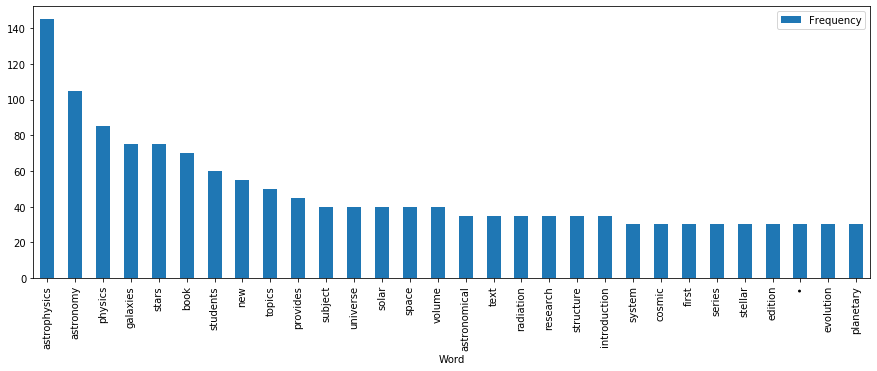

In [13]:
astrophysics = most_common_words('astrophysics_search.csv', 30)
astrophysics_df = pd.DataFrame(astrophysics, columns = ["Word", "Frequency"])
astrophysics_df.plot.bar(x = "Word", y = "Frequency", figsize = (15,5));

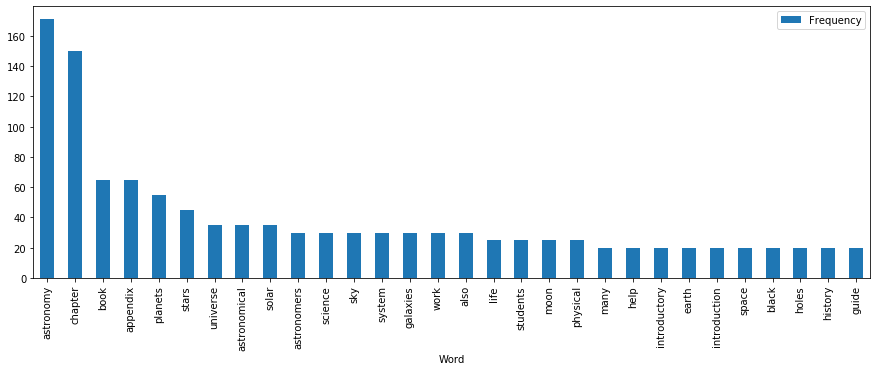

In [14]:
astronomy = most_common_words('astronomy_search.csv', 30)
astronomy_df = pd.DataFrame(astronomy, columns = ["Word", "Frequency"])
astronomy_df.plot.bar(x = "Word", y = "Frequency", figsize = (15,5));

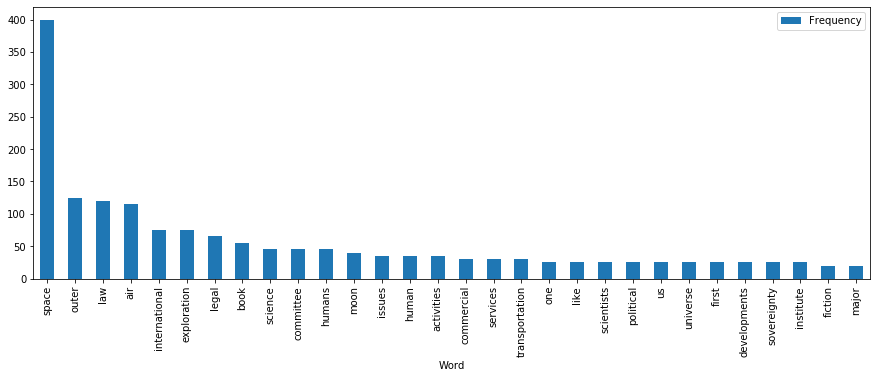

In [15]:
outerspace = most_common_words('outerspace_search.csv', 30)
outerspace_df = pd.DataFrame(outerspace, columns = ["Word", "Frequency"])
outerspace_df.plot.bar(x = "Word", y = "Frequency", figsize = (15,5));

## Discussion
As seen in the results, the majority of the most common words are understandable to the common person. I have seperated words that most likely refer to low level topics and words that most likely refer to high level topics into lists below. The classifications that I have made to seperate these words are assumptions based on my personal knowledge as an astrophysics student and researcher.

Through looking for education resources on Google Books, it can be seen through counting types of words that there are a majority of books which should be understandable to someone outside of the astrophysics field. 

In [20]:
low_level = ['planets', 'stars', 'universe', 'astronomical', 'solar', 'science', 'sky', 'system', 'galaxies', 
             'life', 'astronomers', 'moon', 'earth', 'space', 'physical', 'energy', 'solar', 'space', 'air', 
             'international', 'exploration', 'humans', 'moon', 'commercial', 'transportation', 'political', 
             'introductory', 'students', 'introduction']
high_level = ['black hole', 'supernova', 'cosmic', 'radiation', 'stellar', 'legal']

print('number of words refering to LOW level topics: ' + str(len(low_level)))
print('number of words refering to HIGH level topics: ' + str(len(high_level)))

number of words refering to LOW level topics: 29
number of words refering to HIGH level topics: 6


However, reading online books is only one form of education. Interactive education can be much more understandable and effective for beginners. I will explore this idea of the effectiveness of interactive education by having my peers interact with an online visualization of the [scale of the universe](https://scaleofuniverse.com/). I then gathered responses from my peers through [this Google Form](https://docs.google.com/forms/d/e/1FAIpQLSfm89AJ5sIGaAaMiyGKu1ynyF0qKeiTogjYi9LEMUi-kV5XXg/viewform?usp=sf_link). Below are the responses from my peers after interacting with the visualization. 